# Image Operations

**Task**: perform broadcast and reduction operations on a tensor representing a batch of color images

**Goal**: The goal of this exercise was just to get used to thinking about shapes of multidimensional structures. A surprisingly large amount of the thinking that goes into implementing neural net code is getting the shapes right. I didn’t really believe that until I had to figure it out myself a couple of times, and that convinced me that everyone could use some guided practice with that.

# Setup

As usual, you don't need to understand the code in this section.

In [ ]:
# Check versions of Keras and Tensorflow
!pip install -U keras einops
!pip list | egrep 'keras|tensorflow |jax '

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import keras
import keras_cv
from keras import layers
import einops
print(f"Keras version: {keras.__version__}, backend: {keras.backend.backend()}")

Keras version: 3.0.5, backend: jax


In [ ]:
def show_image(image, ax=None, cmap='gray'):
    if ax is None:
        ax = plt.gca()
    ax.axis('off')
    img = np.array(image)
    context = {}
    if len(img.shape) == 2 or img.shape[2] == 1:
        # grayscale
        context = {'image.cmap': cmap}
    with matplotlib.rc_context(rc=context):
        ax.imshow(img.astype('uint8'))

def show_image_grid(images, titles=None, rows=None, cols=3, title_fontsize=8, figsize=(10, 10), cmap='gray'):
    if rows is None:
        rows = (len(images) + (cols - 1)) // cols

    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    # Turn off *all* axes (even those that we wouldn't show an image in)
    for ax in axs.flatten(): ax.axis('off')
    for i, ax in enumerate(axs.flatten()):
        if i >= len(images): break
        show_image(images[i], ax=ax, cmap=cmap)
        if titles is not None:
            ax.set_title(titles[i], fontsize=title_fontsize)

def get_images_from_dataset(dataset, indices):
    if hasattr(dataset, 'file_paths'):
        # FIXME: hardcoded options
        img_loader_opts = dict(target_size=(256, 256), keep_aspect_ratio=True)
        items_by_idx = {idx: keras.utils.load_img(dataset.file_paths[idx], **img_loader_opts) for idx in indices}
    else:
        items_by_idx = {idx: item for idx, (item, label) in enumerate(dataset.unbatch()) if idx in indices}
    return [items_by_idx[idx] for idx in indices]    

def channels_last_to_first(x):
    return einops.rearrange(x, 'b h w c -> b c h w')

### Configure

In [ ]:
class config:
    seed = 123
    learning_rate = 1e-3
    epochs = 1
    batch_size = 9
    image_size = (256, 256)
    model_preset = "efficientnetv2_b0_imagenet"

# Reproducibility: Set a seed so that the results are the same every time this is run.
# See https://keras.io/examples/keras_recipes/reproducibility_recipes/
keras.utils.set_random_seed(config.seed)

### Load the data

We'll use a dataset of flower images for this example, but you can later switch this out for another dataset as long as you keep the file-and-folder structure.

The details of the code in this section are not important at this time; just run these cells.

In [ ]:
path_to_downloaded_file = keras.utils.get_file(
    origin="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",
    extract=True,
)

Let's see what just got downloaded.

In [ ]:
data_path = Path(path_to_downloaded_file).parent / 'flower_photos'
print('\t'.join([path.name for path in data_path.iterdir()]))

roses	sunflowers	daisy	dandelion	tulips	LICENSE.txt


We'll use a Keras utility function to load the data. [Docs](https://keras.io/api/data_loading/image/#imagedatasetfromdirectory-function)



In [ ]:
# Define which classes we want to use, in what order.
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Create training and validation datasets
train_dataset, val_dataset = keras.utils.image_dataset_from_directory(
    data_path,
    validation_split=0.2,
    labels='inferred',
    class_names=class_names,
    label_mode='int',
    batch_size=config.batch_size,
    image_size=config.image_size,
    shuffle=True,
    seed=128,
    subset='both',
    crop_to_aspect_ratio=True   
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


Let's show some example images.

2024-03-01 11:10:26.791390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


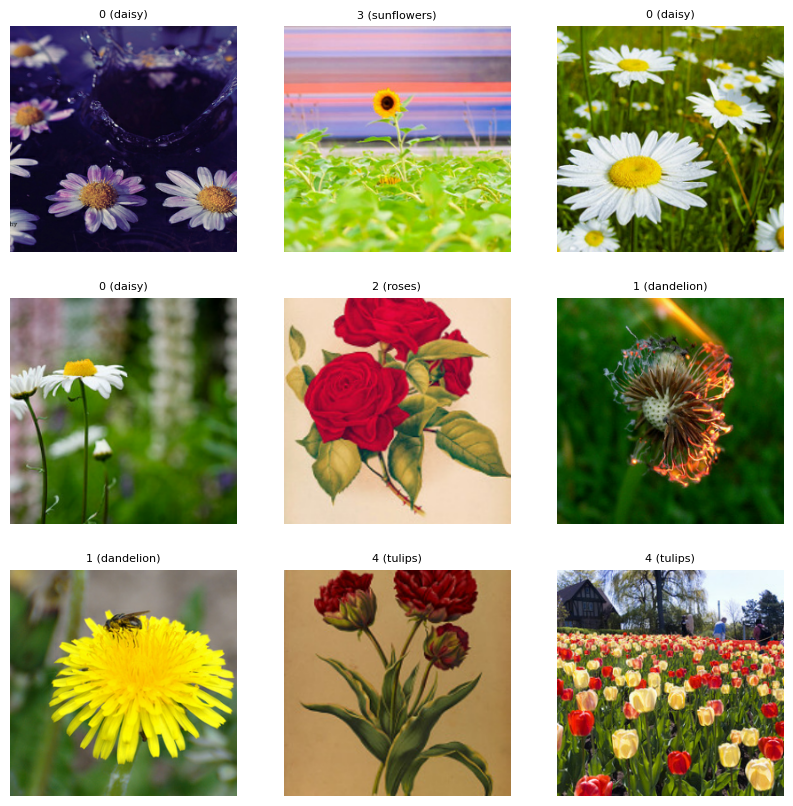

In [ ]:
[[images, labels]] = train_dataset.take(1)
images = images.numpy()
labels = labels.numpy()
show_image_grid(
    images,
    titles=[f"{label} ({class_names[label]})" for label in labels])

# Task

Note: *all of these operations are one-liners*. If you find yourself writing lots of code, pause and think more (or ask for help).

1. **What does each number of `images.shape` represent?**

In [ ]:
print(images.shape)
for i in range(len(images.shape)):
    print(f"Axis {i} size is {images.shape[i]}")


(9, 256, 256, 3)
Axis 0 size is 9
Axis 1 size is 256
Axis 2 size is 256
Axis 3 size is 3


*your answer here*

2. **Evaluate `labels`**. Explain those numbers, with the help of `class_names`.

In [ ]:
labels

array([0, 3, 0, 0, 2, 1, 1, 4, 4], dtype=int32)

In [ ]:
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

*your answer here*

3. **Show the first image in the batch.** (Use `show_image`.)

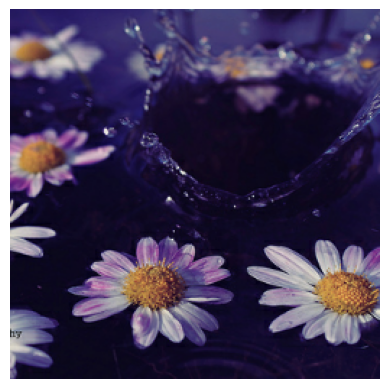

In [ ]:
# your code here

4. **Show the average image.** Hint: you can compute this by taking the `.mean(axis=___)`; think about what the blank is.

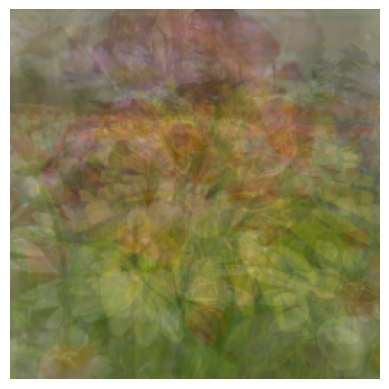

In [ ]:
# your code here

5. Show the average of the **middle 3 images.**

You'll need to use *slicing* to compute this. (To make sure you're doing it right, first *show the middle 3 images* using `show_image_grid`.)

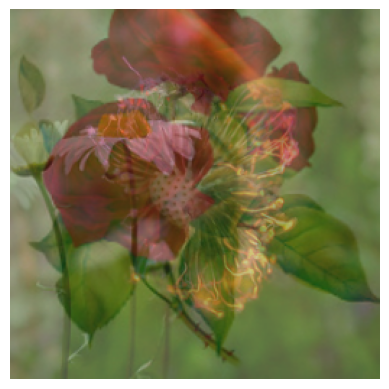

In [ ]:
# your code here

6. **Show the grayscale version of all of the images.**

- *Do this by making minimal changes to the previous exercise; do not import anything new.*
- For simplicity, just use an equal weighting of the red, green, and blue channels, i.e., take the `mean` across channels.
- You can use `show_image_grid` to show all of the images.

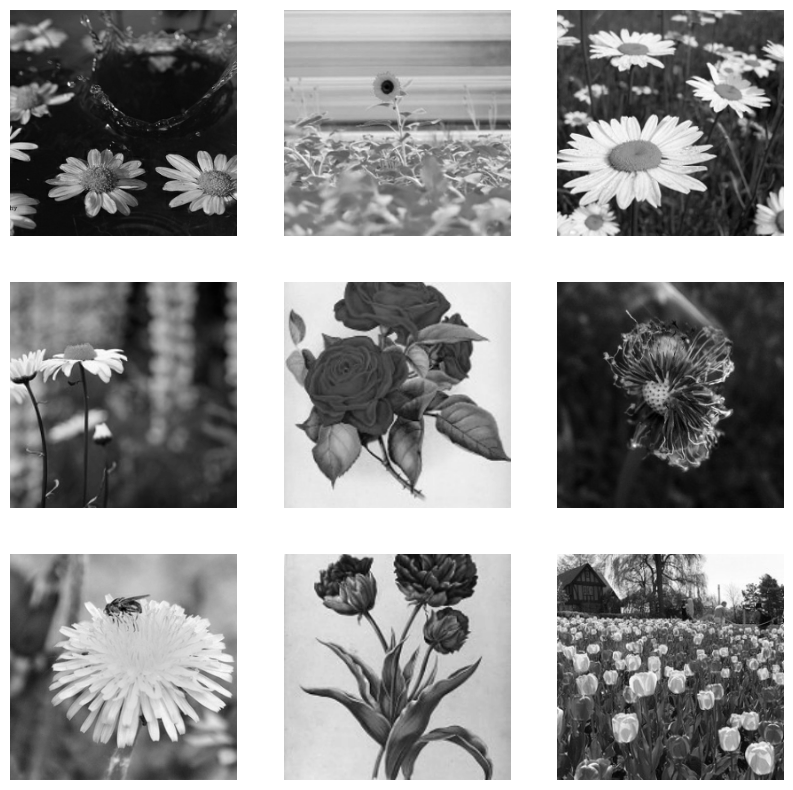

In [ ]:
# your code here

7. **Invert the color of the grayscale images** (e.g., black becomes white). Show the result.

In [ ]:
print(f"{gray_images.min()=}, {gray_images.max()=}")

gray_images.min()=0.0, gray_images.max()=253.33333333333334


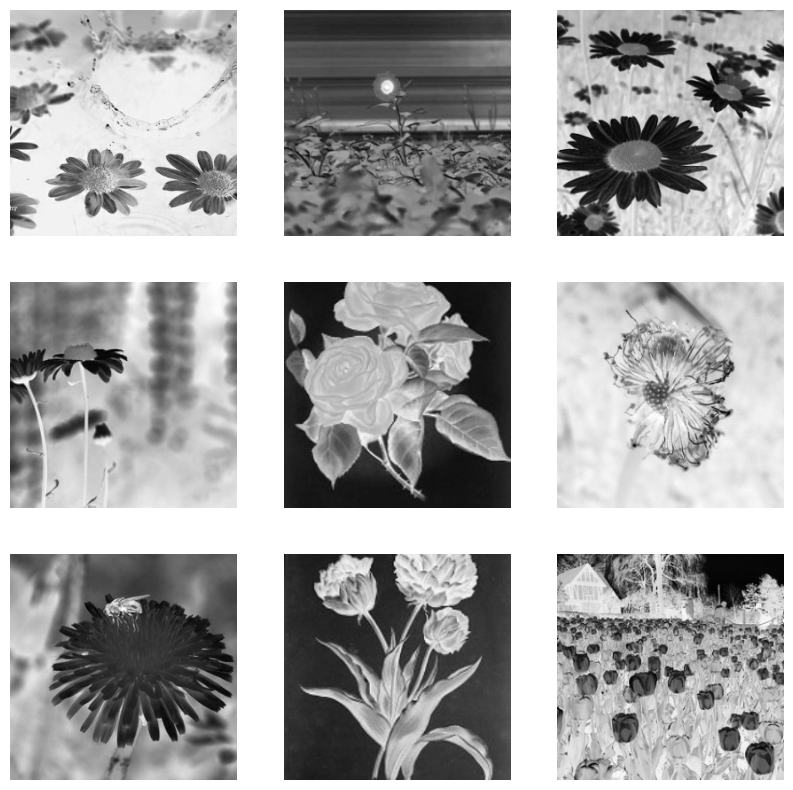

In [ ]:
# your code here

## Convolution layers

We'll set up a demonstration convolution layer that we can poke at. We'll use random initialization, but set a seed so it's consistent. (Note that the specific random weights might depend on whether or not a GPU is being used, so you still may not see exactly the same outputs as the example.)

In [ ]:
keras.utils.set_random_seed(0)
demo_conv_layer = layers.Conv2D(filters=4, kernel_size=(5, 5))

We'll try running it on a sample image. Since conv layers are designed to run on batches, we'll need to add a "batch" dimension to the image. We can do this using the `expand_dims` function, which adds a new dimension of size 1 at the specified position. Or we just use slicing syntax.

In [ ]:
example_image = images[5]
example_image_as_batch = images[5:6]
# alternative: example_image_as_batch = np.expand_dims(example_image, axis=0)
example_image_as_batch.shape

(1, 256, 256, 3)

Now we give that image batch to the conv layer. Predict what you think the output shape will be, and then check your answer by running the code.

In [ ]:
demo_conv_activations = demo_conv_layer(example_image_as_batch)
#demo_conv_activations.shape

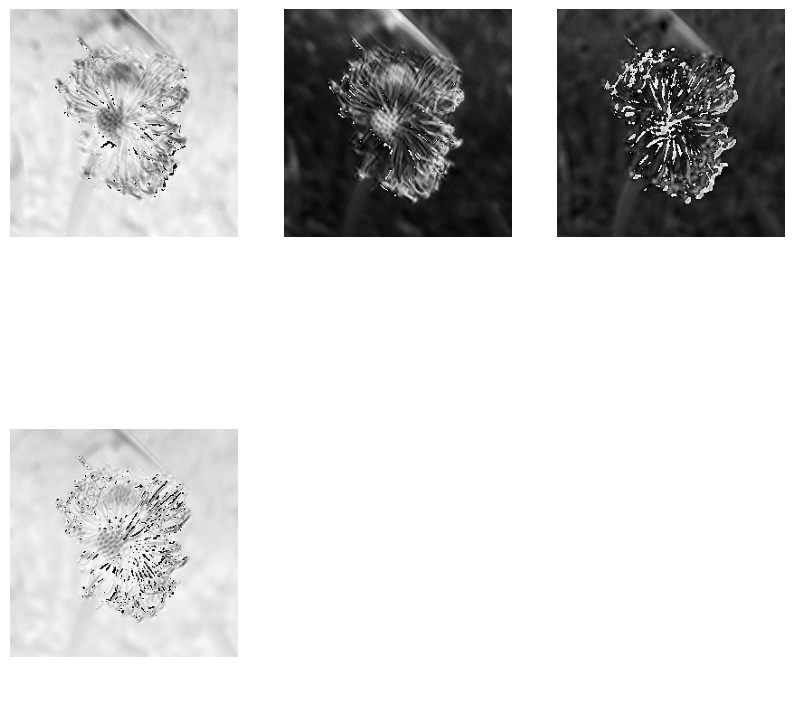

In [ ]:
show_image_grid(
    channels_last_to_first(demo_conv_activations)[0])

Finally, let's look at the weights of the conv layer. What shape do you expect them to be? Check your answer by running the code.

In [ ]:
w, b = demo_conv_layer.get_weights()
# print(w.shape)
# print(b.shape)

**Your turn**:

1. For each number in the shape of the *activations*, explain what it represents.
2. For each number in the shape of the *weightss*, explain what it represents.
3. For each of those numbers above, change something about the code above so that that number changes (or explain why you can't). Explain the changes you made.

*your answer here*

## A real conv layer

Let's just look at what a real conv layer does. We'll load the pretrained backbone that we used in prior homeworks, find its first conv layer, and run it on the same image.

Fist, loading the model:

In [ ]:
# Create a model using a pretrained backbone
# See https://keras.io/api/keras_cv/models/tasks/image_classifier/ for options
model = keras_cv.models.ImageClassifier.from_preset(
    config.model_preset,
    num_classes=len(class_names))

model.backbone.summary()

Model: "efficient_net_v2b0_backbone"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ stem_conv (Conv2D)              │ (None, None, None, 32) │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ stem_bn (BatchNormalization)    │ (None, None, None, 32) │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ stem_activation (Activation)    │ (None, None, None, 32) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1a_ (FusedMBConvBlock)     │ (None, None, None, 16) │         4,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2a_ (FusedMBConvBlock)     │ (None, None, None, 32) │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2b_ (FusedMBConvBlock)     │ (None, None, None, 32) │        41,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3a_ (FusedMBConvBlock)     │ (None, None, None, 48) │        43,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3b_ (FusedMBConvBlock)     │ (None, None, None, 48) │        93,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4a_ (MBConvBlock)          │ (None, None, None, 96) │        36,108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4b_ (MBConvBlock)          │ (None, None, None, 96) │        99,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4c_ (MBConvBlock)          │ (None, None, None, 96) │        99,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5a_ (MBConvBlock)          │ (None, None, None,     │       158,296 │
│                                 │ 112)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5b_ (MBConvBlock)          │ (None, None, None,     │       200,732 │
│                                 │ 112)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5c_ (MBConvBlock)          │ (None, None, None,     │       200,732 │
│                                 │ 112)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5d_ (MBConvBlock)          │ (None, None, None,     │       200,732 │
│                                 │ 112)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5e_ (MBConvBlock)          │ (None, None, None,     │       200,732 │
│                                 │ 112)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block6a_ (MBConvBlock)          │ (None, None, None,     │       254,812 │
│                                 │ 192)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block6b_ (MBConvBlock)          │ (None, None, None,     │       574,512 │
│                                 │ 192)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block6c_ (MBConvBlock)          │ (None, None, None,     │       574,512 │
│                                 │ 192)                   │             

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,858,704 (22.35 MB)

 Non-trainable params: 60,608 (236.75 KB)

The first layer rescales the input from [0, 255] to [0, 1].

In [ ]:
1/model.backbone.layers[1].scale

255.0

Right after that is the first conv layer:

In [ ]:
first_conv = model.backbone.layers[2]
w, = first_conv.get_weights()
w.shape

(3, 3, 3, 32)

Let's try it on our example images. We'll manually rescale before and after, to make sure we're doing the same thing as the model.

In [ ]:
first_conv_out = first_conv(images / 255.0)
first_conv_out.shape

(9, 128, 128, 32)

You might be confused by the output shape: why is it 128x128? That's because it's using *strided* convolutions, which we haven't talked about yet. Basically it means that only every other output is kept. Also, padding='same', so no pixels are lost on the borders.

In [ ]:
first_conv.strides, first_conv.padding

((2, 2), 'same')

So what's it look like? Let's visualize the output.

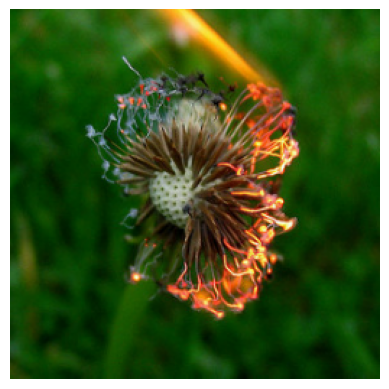

In [ ]:
show_image(images[5])

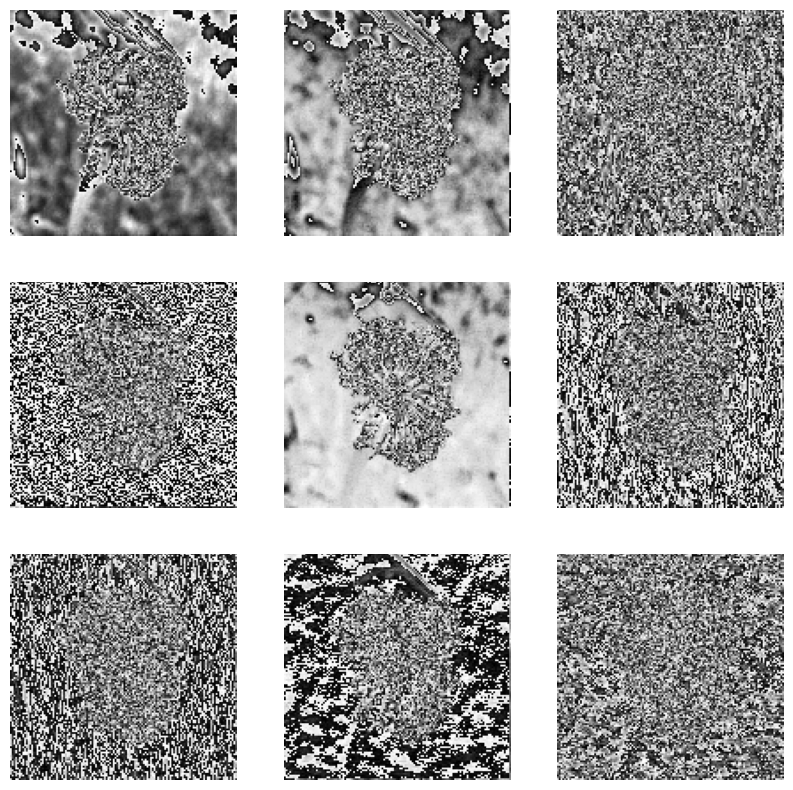

In [ ]:
show_image_grid(
    channels_last_to_first(first_conv_out)[5][:9] * 255.0)

**Analysis**: In the `summary` table above, find this first convolution layer. Note the `Param #` column. Write an expression (like you'd that uses the values from the kernel shape you saw above and evaluates to the number of parameters in this layer (864).

*your answer here*